In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model

In [3]:
#Connect to the database
import sqlalchemy as sql
engine = sql.create_engine("sqlite:///../Database/sales.db")
print(engine.table_names())

['sales', 'weather']


C:\Users\Rica6\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  after removing the cwd from sys.path.


In [4]:
#Read Sales dataset from database
query = 'Select * from sales'
sales_df = pd.read_sql(query, con=engine)
sales_df

,index,item,item_code,quantity,unit_price,total_sales_amount,date,Type
0,0,PINT Spotted Cow,3140,64,3.937500,252.00,2021-01-08 00:00:00.000000,Beer
1,1,DBL RAIL Vodka,3455,37,4.945946,183.00,2021-01-08 00:00:00.000000,Vodka
2,2,BTL Miller High Life,3122,31,3.250000,100.75,2021-01-08 00:00:00.000000,Beer
3,3,PINT Stein,3141,29,3.517241,102.00,2021-01-08 00:00:00.000000,Beer
4,4,SHOT Seagrams VO,3325,26,2.423077,63.00,2021-01-08 00:00:00.000000,Scotch/Whiskey
...,...,...,...,...,...,...,...,...
23841,23841,Skyy Watermelon BOMB,3374,1,4.000000,4.00,2020-01-03 00:00:00.000000,Vodka
23842,23842,PIT LKFT Hazy Rabbit,3359,1,15.000000,15.00,2020-01-03 00:00:00.000000,Beer
23843,23843,PIT Abita TurboDog,3363,1,15.000000,15.00,2020-01-03 00:00:00.000000,Beer
23844,23844,SHOT Titos,3655,1,0.000000,0.00,2020-01-03 00:00:00.000000,Vodka


In [5]:
sales_df.describe()

,index,item_code,quantity,unit_price,total_sales_amount
count,23846.000000,23846.000000,23846.000000,23846.000000,23846.000000
mean,11922.500000,3221.302944,11.079510,5.147705,55.500769
std,6883.891596,278.452809,17.736896,4.944210,101.401739
min,0.000000,2696.000000,1.000000,0.000000,0.000000
25%,5961.250000,3113.000000,2.000000,3.000000,7.000000
50%,11922.500000,3234.000000,5.000000,4.304952,20.500000
75%,17883.750000,3452.000000,13.000000,7.000000,65.000000
max,23845.000000,3717.000000,293.000000,206.000000,5974.000000


In [16]:
X = np.array(sales_df['quantity']).reshape(-1, 1)
y = np.array(sales_df['total_sales_amount']).reshape(-1, 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(y_train)
print(y_pred)

[[ 99.83184979]
 [281.82597691]
 [ 79.15069898]
 ...
 [ 91.55938947]
 [132.92169108]
 [752.90123002]]


In [21]:
model.score(X_test, y_test)

0.408936503592238

In [22]:
model.score(X_train, y_train)

0.6462815451040367

In [23]:
model.coef_

array([[4.13623016]])

In [24]:
model.intercept_

array([8.83478623])

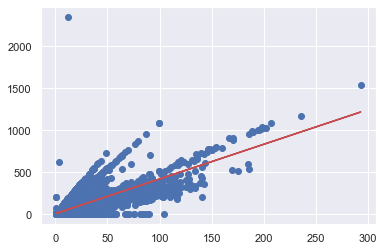

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 8.83 + 04.13*X_train, 'r')
plt.show()

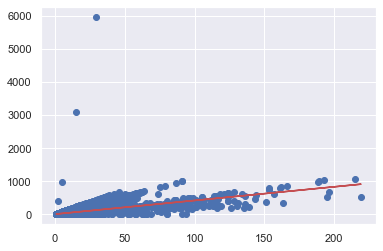

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 8.83 + 04.13*X_test, 'r')
plt.show()